# ANALISI DATI ESERCIZI 8.1/2

In [1]:
import matplotlib.pyplot as plt
import numpy as np

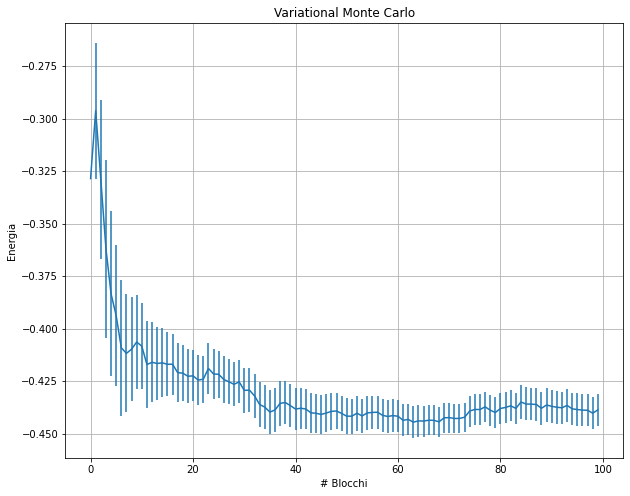

In [2]:
energy=np.loadtxt("Esercizio8_1/energy.txt")
plt.figure(figsize=(10,8))

#I have plotted a function of number of throws, not blocks
n=np.arange(100)
plt.errorbar(n,energy[:,0],yerr=energy[:,1])

plt.grid(True)
plt.xlabel("# Blocchi")
plt.ylabel("Energia" )
plt.title("Variational Monte Carlo")
plt.show()

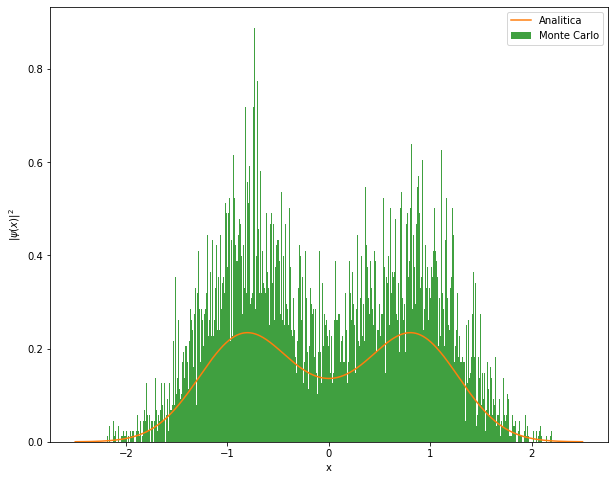

In [5]:
def psi2(x, mu, sigma):
    y= np.power(np.exp(-(x-mu)*(x-mu)/(sigma*sigma*2.))+np.exp(-(x+mu)*(x+mu)/(sigma*sigma*2.)),2)
    return y/(2.*sigma*np.pi*(1+np.exp(-mu*mu/(sigma*sigma))))

psi= np.loadtxt("Esercizio8_1/psi.txt",)
plt.figure(figsize=(10,8))
x=np.linspace(-2.5,2.5,1000)
plt.hist(psi, 500, density=True,facecolor='g', alpha=0.75, label="Monte Carlo")
#plt.plot(x_lin,psi_teo[0]**2, label="Analytic")
plt.plot(x,psi2(x, 0.85, 0.62), label="Analitica")
plt.legend()
plt.xlabel("x")
plt.ylabel("$|\psi(x)|^2$" )
plt.show()

La distribuzione campionata dal mio Monte Carlo segue l'andamento della funzione analitica.

## Esercizio 8.3

In [6]:
def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 6
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)
psi_teo=psi

In [7]:
psi_gs=np.loadtxt("QMC_1D/GS_psi/probability.dat")
constant_gs=np.loadtxt("QMC_1D/constant_psi/probability.dat")

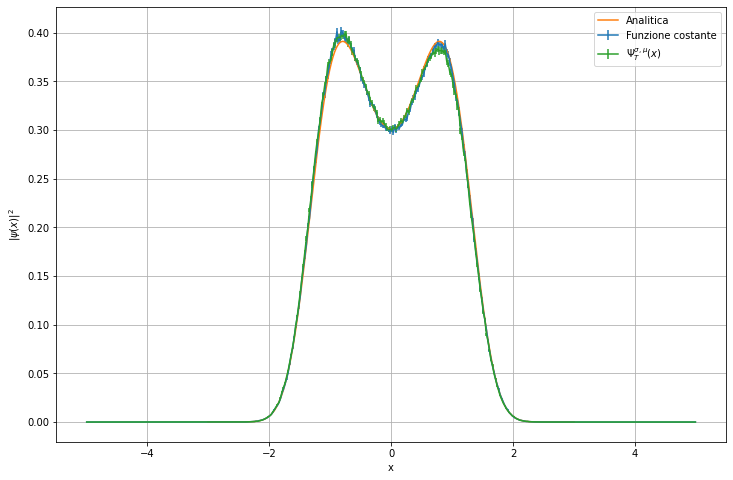

In [15]:
plt.figure(figsize=(12,8));
plt.errorbar(constant_gs[:,0],constant_gs[:,1], yerr=constant_gs[:,2], label='Funzione costante');
plt.grid(True)
plt.xlabel("x")
plt.ylabel("$|\psi(x)|^2$" )
x_lin= np.linspace(-3, 3, 1000)
plt.plot(x_lin,psi_teo[0]**2, label="Analitica")
plt.errorbar(psi_gs[:,0], psi_gs[:,1], yerr=psi_gs[:,2], label="$\Psi_T^{\sigma,\mu}(x)$");
plt.legend();

Anche con la funzione d'onda costante la simulazione riesce a ottenere un buon campionamento della distribuzione. 

## Immaginary time reduction

In [9]:
TR_psi=np.loadtxt("QMC_1D/TR_psi/probability.dat")

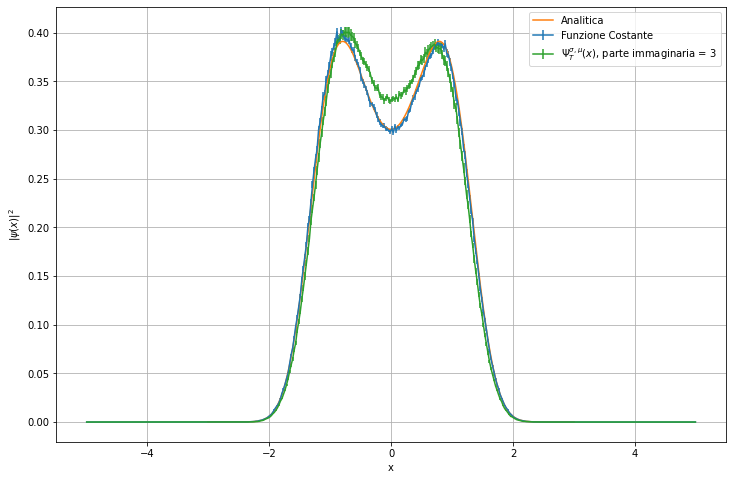

In [16]:
plt.figure(figsize=(12,8));
plt.errorbar(constant_gs[:,0],constant_gs[:,1], yerr=constant_gs[:,2], label='Funzione Costante');
plt.grid(True)
plt.xlabel("x")
plt.ylabel("$|\psi(x)|^2$" )
x_lin= np.linspace(-3, 3, 1000)
plt.plot(x_lin,psi_teo[0]**2, label="Analitica")
plt.errorbar(TR_psi[:,0], TR_psi[:,1], yerr=TR_psi[:,2], label="$\Psi_T^{\sigma,\mu}(x)$, parte immaginaria = 3");
plt.legend();

### PIMC T>0

In [11]:
psi_pimc=np.loadtxt("QMC_1D/Pimc_psi/probability.dat")

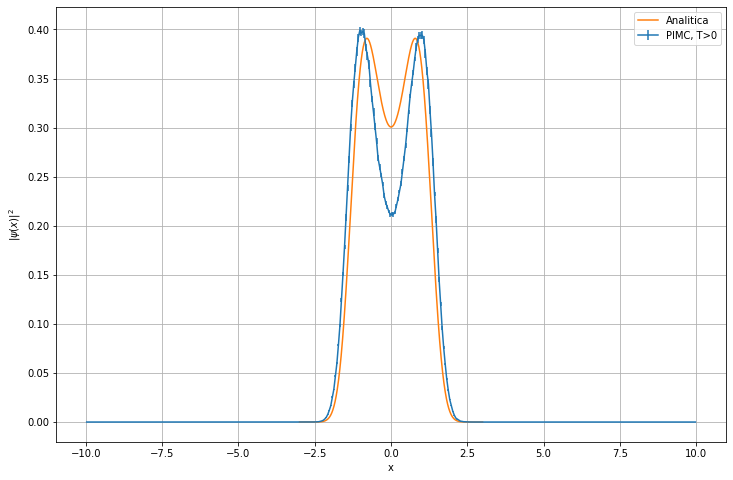

In [17]:
plt.figure(figsize=(12,8));
plt.errorbar(psi_pimc[:,0], psi_pimc[:,1], yerr=psi_pimc[:,2], label='PIMC, T>0');
plt.grid(True)
plt.xlabel("x")
plt.ylabel("$|\psi(x)|^2$" )
x_lin= np.linspace(-3, 3, 1000)
plt.plot(x_lin,psi_teo[0]**2, label="Analitica")
plt.legend();